In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
plt.set_cmap('jet')


In [2]:
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP_RATE/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_MS_BHP_RATE/'
data_dir = '/data3/Astro/personal/zjin/datasets/9W_MS_BHP_RATE_GAU/'

# case_name = '9w_bhp'
# case_name = '9w_bhp_rate'
case_name = '9w_ms_bhp_rate'

state_file = case_name + '_train_n_400_full'
ctrl_file = case_name + '_norm_bhps_n_400'

# case_suffix = '_single_out_rel_3'
# case_suffix = '_single_out_rel_2'
# case_suffix = '_single_out_rel_1'
# case_suffix = '_fix_wl_rel_1'
case_suffix = '_fix_wl_rel_4'
train_suffix = '_with_p'

state_data = state_file + case_suffix + '.mat'
ctrl_data = ctrl_file + case_suffix + '.mat'

In [3]:
hf_r = h5py.File(data_dir + state_data, 'r')
sat = np.array(hf_r.get('sat'))
pres = np.array(hf_r.get('pres'))
hf_r.close()

In [4]:
print(sat.shape)
sat = sat.T.reshape((400, 201, 3600))
pres = pres.T.reshape(400,201,3600)
print("sat shape:{}".format(sat.shape))
print("pres shape:{}".format(pres.shape))

(3600, 80400)
sat shape:(400, 201, 3600)
pres shape:(400, 201, 3600)


In [5]:
dt = 10 # timestep, not days

case number: 1
case number: 101
case number: 201
case number: 301


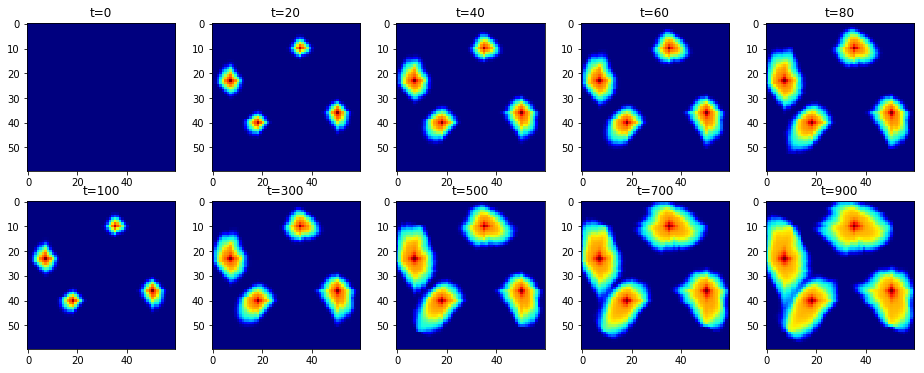

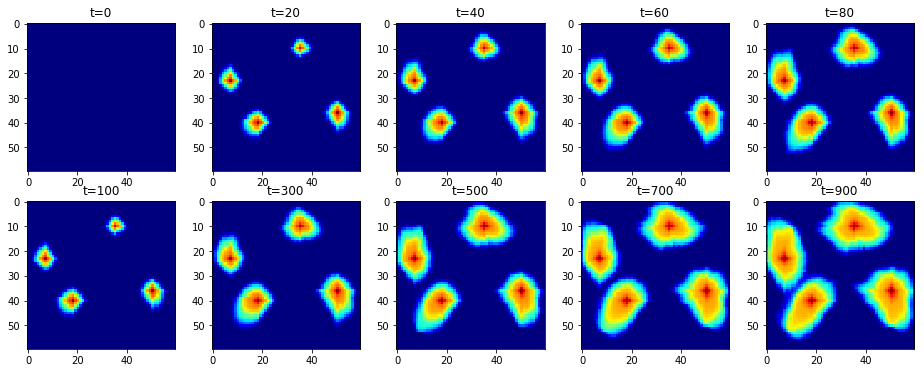

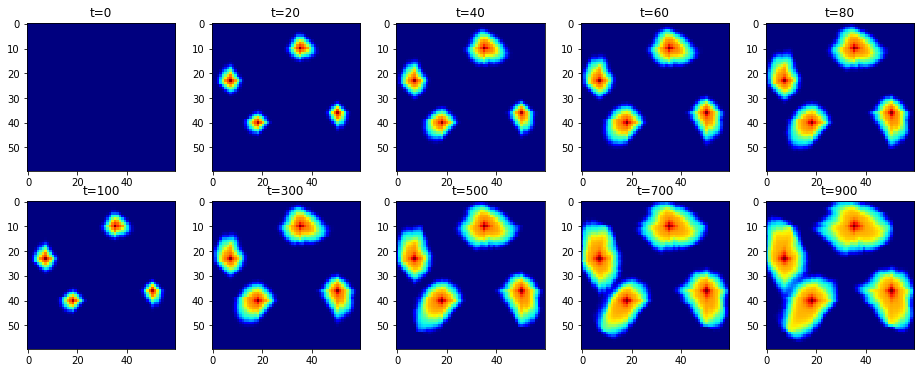

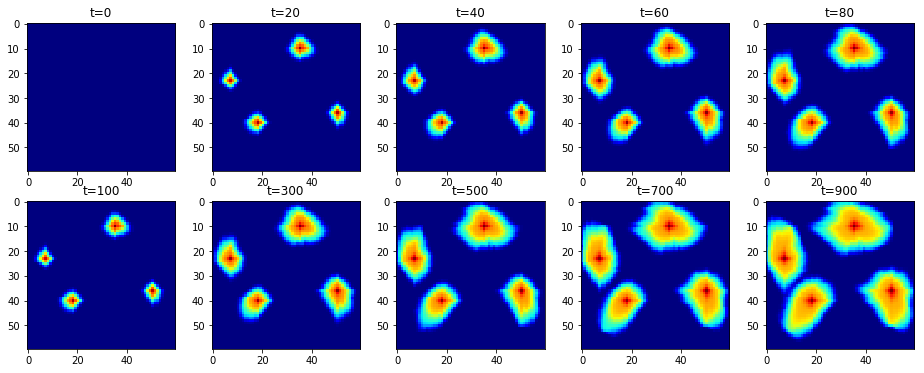

In [6]:
for k in range(4):
    i_case = 100*k+1
    print("case number: %d"%(i_case))
    plt.figure(figsize=(16,6))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(sat[i_case, t*10, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*dt))
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(sat[i_case, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*dt))
plt.show()

(400, 201, 3600)


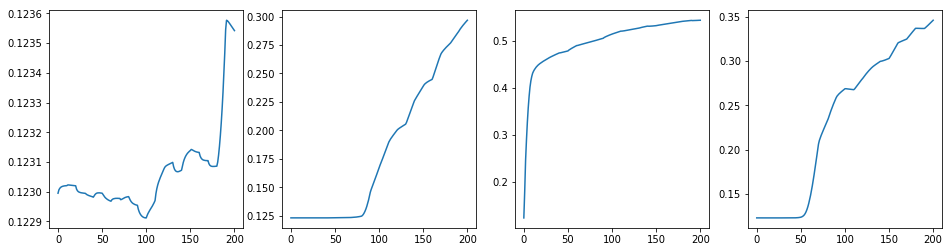

In [7]:
k=[1220, 1240, 2420, 2440]
print(pres.shape)
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.plot(range(201), sat[101,:,k[i]])

In [10]:
bin_sat = np.where(sat > 0.14, 1, 0)
print(bin_sat.shape)

(400, 201, 3600)


case number: 1
case number: 101
case number: 201
case number: 301


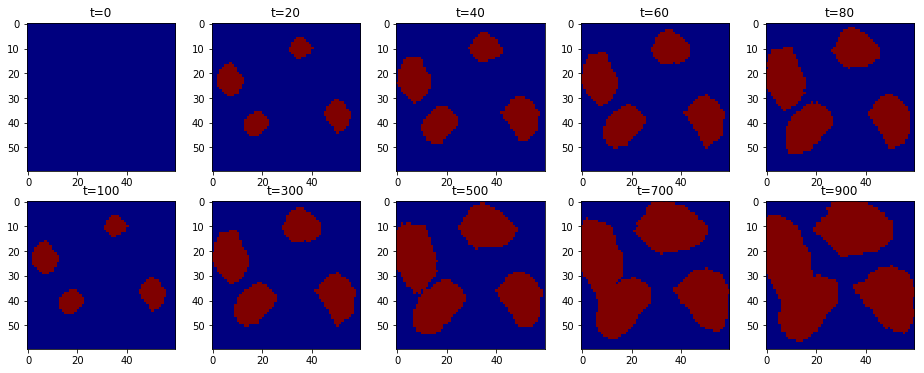

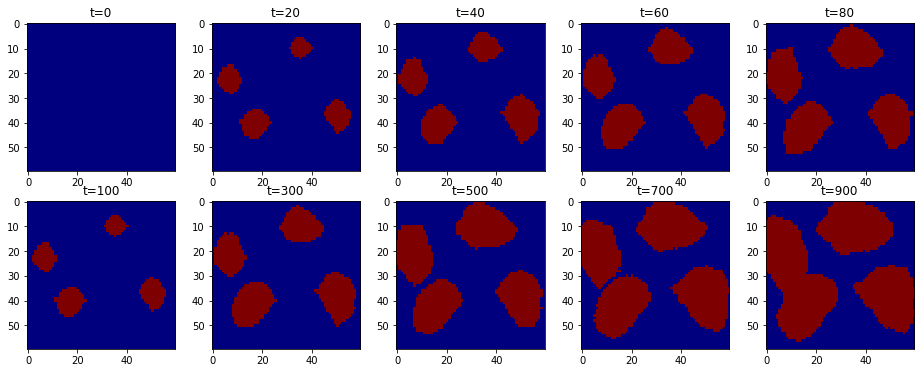

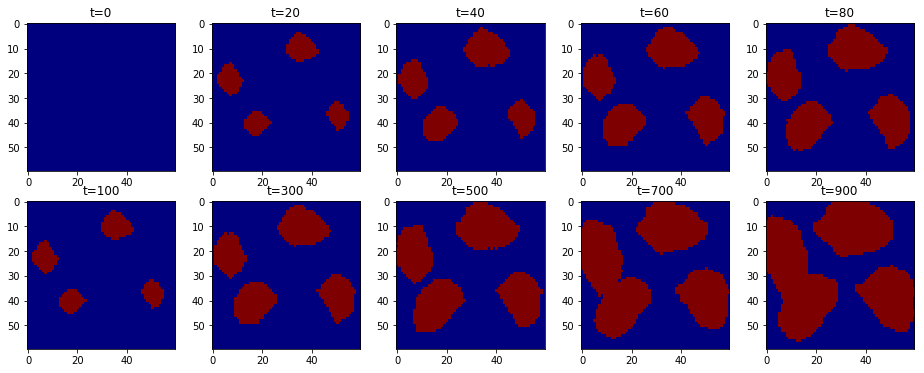

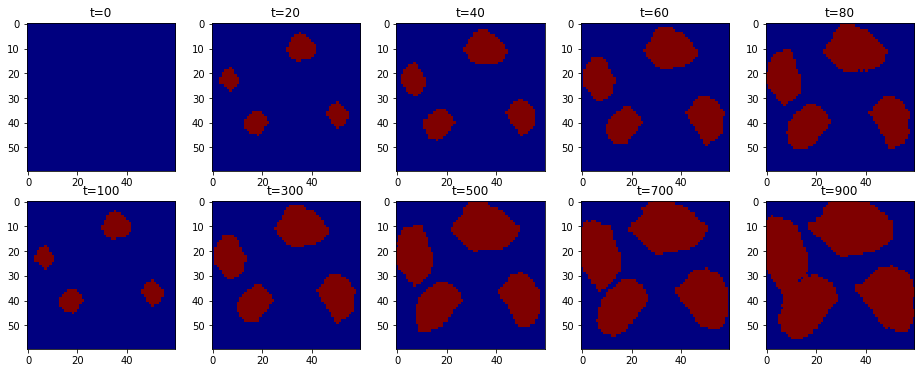

In [11]:
for k in range(4):
    i_case = 100*k+1
    print("case number: %d"%(i_case))
    plt.figure(figsize=(16,6))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(bin_sat[i_case, t*10, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*dt))
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(bin_sat[i_case, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*dt))
plt.show()

In [12]:
# # boundary detection
# import numpy as np
# import matplotlib.pyplot as plt

# from skimage import measure


# # Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# # Find contours at a constant value of 0.8
# contours = measure.find_contours(r, 0.8)

# # Display the image and plot all contours found
# fig, ax = plt.subplots()
# ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

# for n, contour in enumerate(contours):
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

# ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()

ModuleNotFoundError: No module named 'skimage'

In [40]:
a = bin_sat[0, 50, :].reshape((60,60))
b = bin_sat[0, 100, :].reshape((60,60))

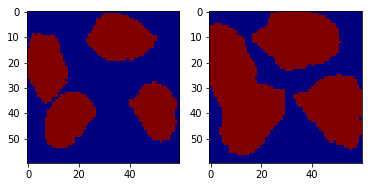

In [41]:
plt.figure()
plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(b)

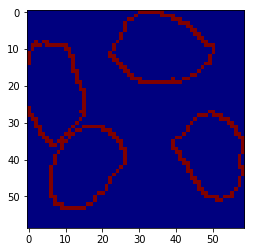

In [38]:
x_edge = a[1:,:-1] - a[:-1,:-1] # 59 x59
y_edge = a[:-1,1:] - a[:-1,:-1] # 59 x59
all_edge = np.maximum(np.fabs(x_edge),np.fabs(y_edge))
plt.imshow(all_edge)

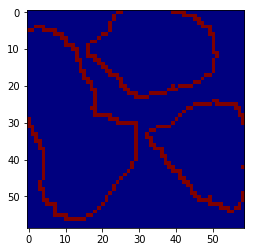

In [67]:
x_edge = b[1:,:-1] - b[:-1,:-1] # 59 x59
y_edge = b[:-1,1:] - b[:-1,:-1] # 59 x59
all_edge = np.maximum(np.fabs(x_edge),np.fabs(y_edge))
plt.imshow(all_edge)

In [64]:
# test on numpy, not on tensorflow
def get_bin_sat_loss(state_true, state_pred):
    '''
    @params: state_true: shape of (batch, 60, 60, 2)
             state_pred: shape of (batch, 60, 60, 2)
    @return: loss scalar
    '''
    sat_threshold = 0.14
    sat_true = state_true[:, :, :, [0]]
    sat_pred = state_pred[:, :, :, [0]]
    print(sat_true.shape)
    edge_true = get_sat_edge(sat_true)
    edge_pred = get_sat_edge(sat_pred)
    return np.sum(np.fabs(edge_true - edge_pred))
    
def get_sat_edge(sat):
    '''
    @params: sat: shape of (batch, 60, 60, 1)
    
    @return: edge: shape of (batch, 59, 59, 1)
    '''
    x_edge = sat[:, 1:,:-1,:] - sat[:, :-1,:-1,:] # 59 x59 x1
    y_edge = sat[:, :-1,1:,:] - sat[:, :-1,:-1,:] # 59 x59 x1
    all_edge = np.maximum(np.fabs(x_edge), np.fabs(y_edge))
    print(all_edge.shape)
    return all_edge

In [73]:
a_ = np.concatenate((a[np.newaxis, :, :, np.newaxis], a[np.newaxis, :, :, np.newaxis]), axis=3)
b_ = np.concatenate((b[np.newaxis, :, :, np.newaxis], b[np.newaxis, :, :, np.newaxis]), axis=3)
print(a_.shape)

(1, 60, 60, 2)


In [74]:
loss = get_bin_sat_loss(a_, b_)
print(loss)

(1, 60, 60, 1)
(1, 59, 59, 1)
(1, 59, 59, 1)
582.0


(1, 59, 59, 1)


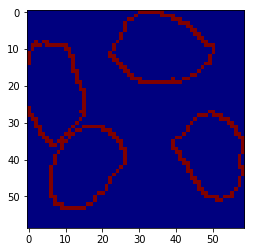

In [75]:
edge_a = get_sat_edge(a_[:,:,:,[0]])
plt.imshow(edge_a.reshape(59,59))

(1, 59, 59, 1)


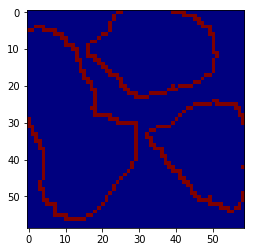

In [76]:
edge_b = get_sat_edge(b_[:,:,:,[0]])
plt.imshow(edge_b.reshape(59,59))